In [23]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.4 MB/s eta 0:00:00


In [24]:
!pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=3ab918c436ee87f8df8fa2a0f46ded38b5da60d1f50db0fb740bc94b502c8403
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [84]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-9_klgo42/tensorflow-gpu_8d22ac56fa9a4d63a04be9bff8674fcf/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originat

In [26]:
!pip install keras

# Data Preprocessing

## Data collection

In [27]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas_ta as ta

### Saham Chevron

In [28]:
start_time = '2018-12-11'
end_time = '2023-03-31'

In [29]:
df_cvx = yf.download('CVX',
                    start=start_time,
                    end=end_time)

[*********************100%***********************]  1 of 1 completed


In [30]:
df_cvx

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-12-11  116.260002  116.620003  113.949997  115.470001   94.542473   
2018-12-12  117.110001  117.720001  115.570000  115.620003   94.665291   
2018-12-13  115.150002  116.320000  114.309998  115.940002   94.927315   
2018-12-14  115.010002  115.809998  113.309998  113.830002   93.199699   
2018-12-17  113.440002  114.970001  111.860001  112.449997   92.069817   
...                ...         ...         ...         ...         ...   
2023-03-24  152.100006  156.649994  151.830002  156.059998  154.546600   
2023-03-27  157.399994  158.479996  155.690002  157.649994  156.121185   
2023-03-28  157.279999  160.190002  156.679993  159.490005  157.943344   
2023-03-29  160.619995  161.320007  159.330002  160.860001  159.300064   
2023-03-30  162.250000  163.009995  161.580002  162.389999  160.815216   

             Volume  
Date                 
2018-12-11  5929400  
2018-12-12  7891400  
2018-12-13  7030500  
2018-12-14  6195400  
2018-12-17  7132400  
...             ...  
2023-03-24  6600100  
2023-03-27  7006800  
2023-03-28  5605400  
2023-03-29  7569700  
2023-03-30  6322400  

[1083 rows x 6 columns]

In [31]:
df_cvx.to_csv(f'CVX-Stock-Price_{start_time}-{end_time}', index=False)

### Saham Shell

In [32]:
df_shel = yf.download('SHEL',
                    start=start_time,
                    end=end_time)

[*********************100%***********************]  1 of 1 completed


In [33]:
df_shel

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2018-12-11  59.340000  59.450001  58.110001  58.490002  48.090553  4228469
2018-12-12  59.310001  59.764999  58.889999  58.980000  48.493431  3004016
2018-12-13  58.919998  59.490002  58.770000  59.230000  48.698978  3814479
2018-12-14  59.080002  59.310001  58.119999  58.230000  47.876781  3597037
2018-12-17  58.830002  58.840000  57.509998  57.709999  47.449238  4390067
...               ...        ...        ...        ...        ...      ...
2023-03-24  53.950001  54.825001  53.740002  54.570000  54.053833  9647766
2023-03-27  55.189999  56.077000  54.869999  55.840000  55.311821  4769003
2023-03-28  55.599998  56.560001  55.529999  56.169998  55.638699  5304799
2023-03-29  57.139999  57.150002  56.770000  57.119999  56.579712  3250394
2023-03-30  58.110001  58.130001  57.529999  57.939999  57.391956  3522244

[1083 rows x 6 columns]

In [34]:
df_shel.to_csv(f'SHELL-Stock-Price_{start_time}-{end_time}', index=False)

### Harga Emas

In [35]:
df_gc = yf.download('GC=F',
                    start=start_time,
                    end=end_time)

[*********************100%***********************]  1 of 1 completed


In [36]:
df_gc

Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-12-11  1245.800049  1248.699951  1241.500000  1241.900024  1241.900024   
2018-12-12  1245.300049  1245.599976  1244.099976  1244.400024  1244.400024   
2018-12-13  1243.500000  1243.500000  1241.000000  1242.699951  1242.699951   
2018-12-14  1241.699951  1241.699951  1234.099976  1237.000000  1237.000000   
2018-12-17  1239.300049  1247.400024  1239.300049  1247.400024  1247.400024   
...                 ...          ...          ...          ...          ...   
2023-03-24  1991.699951  1995.400024  1982.099976  1982.099976  1982.099976   
2023-03-27  1957.199951  1957.199951  1952.400024  1952.400024  1952.400024   
2023-03-28  1972.400024  1972.400024  1972.400024  1972.400024  1972.400024   
2023-03-29  1966.099976  1966.099976  1966.099976  1966.099976  1966.099976   
2023-03-30  1965.900024  1984.400024  1954.900024  1980.300049  1980.300049   

            Volume  
Date                
2018-12-11     117  
2018-12-12      84  
2018-12-13     194  
2018-12-14      33  
2018-12-17      10  
...            ...  
2023-03-24      19  
2023-03-27     877  
2023-03-28      21  
2023-03-29   88563  
2023-03-30   10119  

[1085 rows x 6 columns]

In [37]:
df_gc.to_csv(f'Gold-Price_{start_time}-{end_time}', index=False)

### Harga Minyak Bumi

In [38]:
df_cl = yf.download('CL=F',
                    start=start_time,
                    end=end_time)

[*********************100%***********************]  1 of 1 completed


In [39]:
df_cl

Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2018-12-11  50.889999  52.430000  50.700001  51.650002  51.650002  665262
2018-12-12  51.950001  52.880001  50.939999  51.150002  51.150002  730810
2018-12-13  51.200001  53.270000  50.349998  52.580002  52.580002  733627
2018-12-14  52.830002  52.950001  50.840000  51.200001  51.200001  526839
2018-12-17  51.250000  51.869999  49.009998  49.880001  49.880001  211257
...               ...        ...        ...        ...        ...     ...
2023-03-24  69.510002  70.379997  66.820000  69.260002  69.260002  380852
2023-03-27  69.419998  73.099998  69.129997  72.809998  72.809998  353598
2023-03-28  72.860001  73.930000  72.190002  73.199997  73.199997  328472
2023-03-29  73.610001  74.370003  72.760002  72.970001  72.970001  312669
2023-03-30  72.980003  74.629997  72.610001  74.370003  74.370003  269743

[1086 rows x 6 columns]

In [40]:
df_cl.to_csv(f'Crude-Oil-Price_{start_time}-{end_time}', index=False)

## Data Reshape

In [41]:
df_cvx.reset_index(inplace=True)
df_shel.reset_index(inplace=True)
df_gc.reset_index(inplace=True)
df_cl.reset_index(inplace=True)

In [42]:
df_cvx['Date'] = df_cvx['Date'].dt.strftime('%Y-%m-%d')
df_shel['Date'] = df_shel['Date'].dt.strftime('%Y-%m-%d')
df_gc['Date'] = df_gc['Date'].dt.strftime('%Y-%m-%d')
df_cl['Date'] = df_cl['Date'].dt.strftime('%Y-%m-%d')

In [43]:
date_cvx = df_cvx['Date'].unique()
date_gc = df_gc['Date'].unique()
date_cl = df_cl['Date'].unique()

In [44]:
# Check date GC
del_gc = []
for i in date_gc:
    if i not in date_cvx:
        del_gc.append(i)

#Check date in CL
del_cl = []
for i in date_cl:
    if i not in date_cvx:
        del_cl.append(i)

In [45]:
#del row not present:
for i in del_gc:
    df_gc.drop(df_gc.loc[(df_gc['Date'] == i)].index, inplace=True)
    
for i in del_cl:
    df_cl.drop(df_cl.loc[(df_cl['Date'] == i)].index, inplace=True)

In [46]:
# Turn Back Into Index Date Time
df_cvx['Date'] = pd.to_datetime(df_cvx['Date'])
df_shel['Date'] = pd.to_datetime(df_shel['Date'])
df_gc['Date'] = pd.to_datetime(df_gc['Date'])
df_cl['Date'] = pd.to_datetime(df_cl['Date'])

df_cvx = df_cvx.set_index('Date')
df_shel = df_shel.set_index('Date')
df_gc = df_gc.set_index('Date')
df_cl = df_cl.set_index('Date')

In [47]:
print(df_cvx.shape)
print(df_shel.shape)
print(df_gc.shape)
print(df_cl.shape)

(1083, 6)
(1083, 6)
(1083, 6)
(1083, 6)


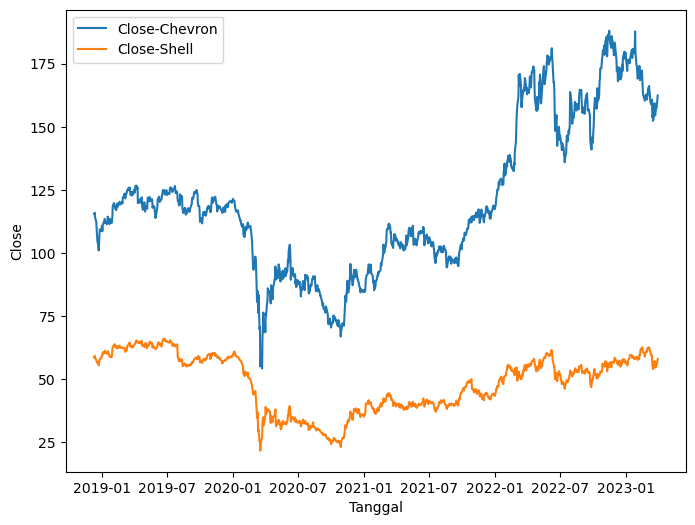

In [48]:
plt.figure(figsize=(8,6))
plt.plot(df_cvx.index,df_cvx['Close'],label = 'Close-Chevron')
plt.plot(df_shel.index,df_shel['Close'],label = 'Close-Shell')
#plt.plot(df_gc.index,df_gc['Close'],label = 'Close-Gold')
#plt.plot(df_cl.index,df_cl['Close'],label = 'Close-Oil')
plt.legend(loc='best')
plt.xlabel('Tanggal')
plt.ylabel('Close')
#plt.title('Grafik Saham Chevron dan Shell, Serta Harga Minyak bumi dan emas \n Periode Januari 2019 - Maret 2023')
plt.savefig('Unormalize.png')

## Data Normalization

In [49]:
column = df_cvx.columns.values.tolist()
sclr = StandardScaler()

new_cvx = pd.DataFrame(sclr.fit_transform(df_cvx))
new_shel = pd.DataFrame(sclr.fit_transform(df_shel))
new_gc = pd.DataFrame(sclr.fit_transform(df_gc))
new_cl = pd.DataFrame(sclr.fit_transform(df_cl))

#Pembenaran Column
new_cvx.columns = column
new_shel.columns = column
new_gc.columns = column
new_cl.columns = column

#Pembenaran Index
new_cvx.index = df_cvx.index
new_shel.index = df_shel.index
new_gc.index = df_gc.index
new_cl.index = df_cl.index

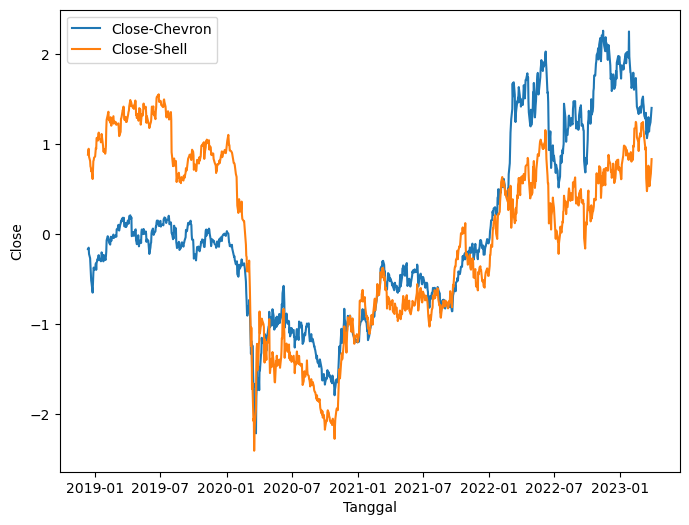

In [50]:
plt.figure(figsize=(8,6))
plt.plot(new_cvx.index,new_cvx['Close'],label = 'Close-Chevron')
plt.plot(new_shel.index,new_shel['Close'],label = 'Close-Shell')
#plt.plot(new_gc.index,new_gc['Close'],label = 'Close-Gold')
#plt.plot(new_cl.index,new_cl['Close'],label = 'Close-Oil')
plt.legend(loc='best')
plt.xlabel('Tanggal')
plt.ylabel('Close')
#plt.title('Grafik Saham Chevron dan Shell, Serta Harga Minyak bumi dan emas \n Periode Januari 2019 - Maret 2023')
plt.savefig('Normalize.png')

### Merging Crude Oil and Gold close to each Oil Company Stock

In [51]:
# Sebelum Normalisasi
df_cvx['Close Oil'] = df_cl['Close']
df_cvx['Close GC'] = df_gc['Close']

df_shel['Close Oil'] = df_cl['Close']
df_shel['Close GC'] = df_gc['Close']

# Setelah Normalisasi
new_cvx['Close Oil'] = new_cl['Close']
new_cvx['Close GC'] = new_gc['Close']

new_shel['Close Oil'] = new_cl['Close']
new_shel['Close GC'] = new_gc['Close']

## Feature Extraction

### Moving Average

In [52]:
df_cvx['MA7'] = df_cvx['Close'].rolling(window=7).mean()
df_cvx['MA14'] = df_cvx['Close'].rolling(window=14).mean()
df_cvx['MA21'] = df_cvx['Close'].rolling(window=21).mean()

df_shel['MA7'] = df_shel['Close'].rolling(window=7).mean()
df_shel['MA14'] = df_shel['Close'].rolling(window=14).mean()
df_shel['MA21'] = df_shel['Close'].rolling(window=21).mean()

#Setelah Normalisasi
new_cvx['MA7'] = new_cvx['Close'].rolling(window=7).mean()
new_cvx['MA14'] = new_cvx['Close'].rolling(window=14).mean()
new_cvx['MA21'] = new_cvx['Close'].rolling(window=21).mean()

new_shel['MA7'] = new_shel['Close'].rolling(window=7).mean()
new_shel['MA14'] = new_shel['Close'].rolling(window=14).mean()
new_shel['MA21'] = new_shel['Close'].rolling(window=21).mean()

### Rate of Change, Stochastic Oscillator, and RSI

In [53]:
df_cvx['Change'] = df_cvx['Close'].diff()
df_shel['Change'] = df_shel['Close'].diff()

df_cvx.ta.stoch(high = 'High', low = 'Low', k = 14, d = 3, append = True)
df_shel.ta.stoch(high = 'High', low = 'Low', k = 14, d = 3, append = True)

STOCHk_14_3_3  STOCHd_14_3_3
Date                                    
2018-12-31            NaN            NaN
2019-01-02            NaN            NaN
2019-01-03      83.437943            NaN
2019-01-04      93.366594            NaN
2019-01-07      95.324962      90.709833
...                   ...            ...
2023-03-24      32.678887      37.241234
2023-03-27      30.323431      34.570187
2023-03-28      32.324621      31.775646
2023-03-29      42.052392      34.900148
2023-03-30      53.228815      42.535276

[1070 rows x 2 columns]

In [54]:
change_cvx = df_cvx['Change']

change_up_cvx = change_cvx.copy()
change_down_cvx = change_cvx.copy()

change_up_cvx[change_up_cvx<0] = 0
change_down_cvx[change_down_cvx>0] = 0

avg_up_cvx = change_up_cvx.rolling(14).mean()
avg_down_cvx = change_down_cvx.rolling(14).mean().abs()

df_cvx['RSI'] = 100 * avg_up_cvx / (avg_up_cvx + avg_down_cvx)

In [55]:
change_shel = df_shel['Change']

change_up_shel = change_shel.copy()
change_down_shel = change_shel.copy()

change_up_shel[change_up_shel<0] = 0
change_down_shel[change_down_shel>0] = 0

avg_up_shel = change_up_shel.rolling(14).mean()
avg_down_shel = change_down_shel.rolling(14).mean().abs()

df_shel['RSI'] = 100 * avg_up_shel / (avg_up_shel + avg_down_shel)

In [56]:
last_column_cvx = df_cvx.pop('Close')
df_cvx.insert(df_cvx.shape[1],'Close',last_column_cvx)

last_column_shel = df_shel.pop('Close')
df_shel.insert(df_shel.shape[1],'Close',last_column_shel)

In [57]:
df_cvx.isna().sum()

Open              0
High              0
Low               0
Adj Close         0
Volume            0
Close Oil         0
Close GC          0
MA7               6
MA14             13
MA21             20
Change            1
STOCHk_14_3_3    15
STOCHd_14_3_3    17
RSI              14
Close             0
dtype: int64

In [58]:
df_shel.isna().sum()

Open              0
High              0
Low               0
Adj Close         0
Volume            0
Close Oil         0
Close GC          0
MA7               6
MA14             13
MA21             20
Change            1
STOCHk_14_3_3    15
STOCHd_14_3_3    17
RSI              14
Close             0
dtype: int64

In [59]:
df_cvx = df_cvx.dropna()
df_shel = df_shel.dropna()

In [60]:
df_shel

Open       High        Low  Adj Close   Volume  Close Oil  \
Date                                                                         
2019-01-10  60.590000  61.380001  60.439999  50.351612  2014108  52.590000   
2019-01-11  60.580002  60.880001  60.290001  49.776070  3121436  51.590000   
2019-01-14  60.119999  60.785000  60.080002  49.669186  2487514  50.509998   
2019-01-15  60.500000  60.939999  60.139999  49.677399  1976413  52.110001   
2019-01-16  60.000000  60.200001  59.799999  49.356747  2873593  52.310001   
...               ...        ...        ...        ...      ...        ...   
2023-03-24  53.950001  54.825001  53.740002  54.053833  9647766  69.260002   
2023-03-27  55.189999  56.077000  54.869999  55.311821  4769003  72.809998   
2023-03-28  55.599998  56.560001  55.529999  55.638699  5304799  73.199997   
2023-03-29  57.139999  57.150002  56.770000  56.579712  3250394  72.970001   
2023-03-30  58.110001  58.130001  57.529999  57.391956  3522244  74.370003   

               Close GC        MA7       MA14       MA21    Change  \
Date                                                                 
2019-01-10  1284.699951  60.312857  58.760000  58.532857  0.280003   
2019-01-11  1287.099976  60.484286  59.053571  58.630476 -0.700001   
2019-01-14  1289.099976  60.655714  59.320000  58.698571 -0.130001   
2019-01-15  1286.199951  60.637143  59.674286  58.755238  0.009998   
2019-01-16  1291.599976  60.551428  59.840714  58.840952 -0.389999   
...                 ...        ...        ...        ...       ...   
2023-03-24  1982.099976  55.477143  57.598571  58.962381 -1.400002   
2023-03-27  1952.400024  55.648572  57.187143  58.734285  1.270000   
2023-03-28  1972.400024  55.965714  56.815714  58.494762  0.329998   
2023-03-29  1966.099976  56.234285  56.562857  58.320952  0.950001   
2023-03-30  1980.300049  56.351428  56.390000  58.130476  0.820000   

            STOCHk_14_3_3  STOCHd_14_3_3        RSI      Close  
Date                                                            
2019-01-10      95.415654      95.230731  74.885286  61.240002  
2019-01-11      94.176621      94.901377  72.960866  60.540001  
2019-01-14      89.747630      93.113302  71.121143  60.410000  
2019-01-15      85.436361      89.786871  82.545881  60.419998  
2019-01-16      81.165492      85.449828  70.190596  60.029999  
...                   ...            ...        ...        ...  
2023-03-24      32.678887      37.241234  23.226243  54.570000  
2023-03-27      30.323431      34.570187  31.102370  55.840000  
2023-03-28      32.324621      31.775646  33.050845  56.169998  
2023-03-29      42.052392      34.900148  38.639280  57.119999  
2023-03-30      53.228815      42.535276  42.484467  57.939999  

[1063 rows x 15 columns]

In [61]:
df_cvx

Open        High         Low   Adj Close   Volume  \
Date                                                                  
2019-01-10  112.510002  113.629997  111.709999   92.888573  6078300   
2019-01-11  113.000000  113.050003  111.669998   92.143509  4491700   
2019-01-14  111.339996  112.339996  111.080002   91.472130  6121700   
2019-01-15  111.980003  113.070000  111.510002   91.799629  4226100   
2019-01-16  111.430000  112.320000  111.220001   91.210114  5624100   
...                ...         ...         ...         ...      ...   
2023-03-24  152.100006  156.649994  151.830002  154.546600  6600100   
2023-03-27  157.399994  158.479996  155.690002  156.121185  7006800   
2023-03-28  157.279999  160.190002  156.679993  157.943344  5605400   
2023-03-29  160.619995  161.320007  159.330002  159.300064  7569700   
2023-03-30  162.250000  163.009995  161.580002  160.815216  6322400   

            Close Oil     Close GC         MA7        MA14        MA21  \
Date                                                                     
2019-01-10  52.590000  1284.699951  111.547142  108.940000  110.287619   
2019-01-11  51.590000  1287.099976  111.811428  109.480000  110.148095   
2019-01-14  50.509998  1289.099976  112.261428  110.016428  109.962381   
2019-01-15  52.110001  1286.199951  112.447142  110.811429  109.780476   
2019-01-16  52.310001  1291.599976  112.324285  111.097857  109.664762   
...               ...          ...         ...         ...         ...   
2023-03-24  69.260002  1982.099976  155.310000  157.688571  159.494287   
2023-03-27  72.809998  1952.400024  155.790000  157.232857  159.267620   
2023-03-28  73.199997  1972.400024  156.811430  156.982857  159.109048   
2023-03-29  72.970001  1966.099976  157.708572  157.007857  159.113334   
2023-03-30  74.370003  1980.300049  158.148573  157.202143  159.129524   

              Change  STOCHk_14_3_3  STOCHd_14_3_3        RSI       Close  
Date                                                                       
2019-01-10  0.180000      91.941773      85.778078  60.866187  113.449997  
2019-01-11 -0.909996      93.372023      90.820572  65.802662  112.540001  
2019-01-14 -0.820000      89.622638      91.645478  65.665414  111.720001  
2019-01-15  0.400002      86.405429      89.800030  76.312057  112.120003  
2019-01-16 -0.720001      80.434200      85.487423  62.960568  111.400002  
...              ...            ...            ...        ...         ...  
2023-03-24  1.539993      33.537980      37.756522  34.306089  156.059998  
2023-03-27  1.589996      37.940546      37.095039  39.924169  157.649994  
2023-03-28  1.840012      49.338824      40.272450  44.608743  159.490005  
2023-03-29  1.369995      61.785033      49.688134  50.558224  160.860001  
2023-03-30  1.529999      74.707989      61.943949  54.244703  162.389999  

[1063 rows x 15 columns]

In [62]:
df_cvx.to_csv('CVX.csv')
df_shel.to_csv('SHEL.csv')
df_gc.to_csv('GC=F.csv')
df_cl.to_csv('CL=F.csv')

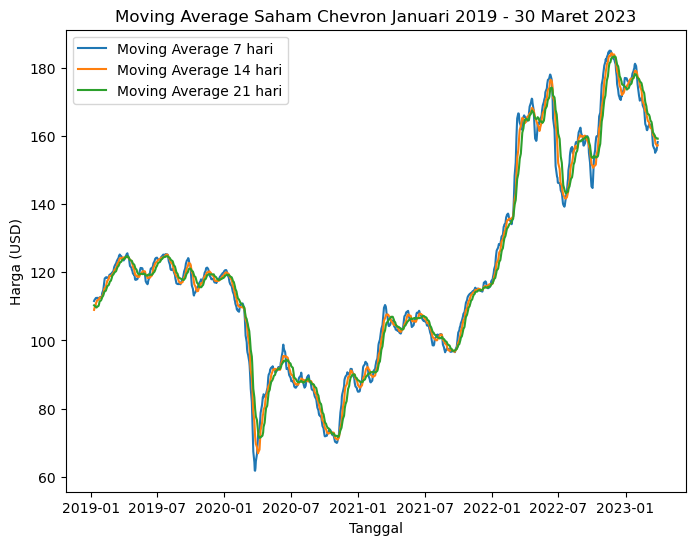

In [63]:
plt.figure(figsize=(8,6))
plt.plot(df_cvx.index, df_cvx['MA7'], label = "Moving Average 7 hari")
plt.plot(df_cvx.index, df_cvx['MA14'], label = "Moving Average 14 hari")
plt.plot(df_cvx.index, df_cvx['MA21'], label = "Moving Average 21 hari")
plt.title('Moving Average Saham Chevron Januari 2019 - 30 Maret 2023')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend(loc='best')
plt.savefig('MA Chevron.png')
plt.show()

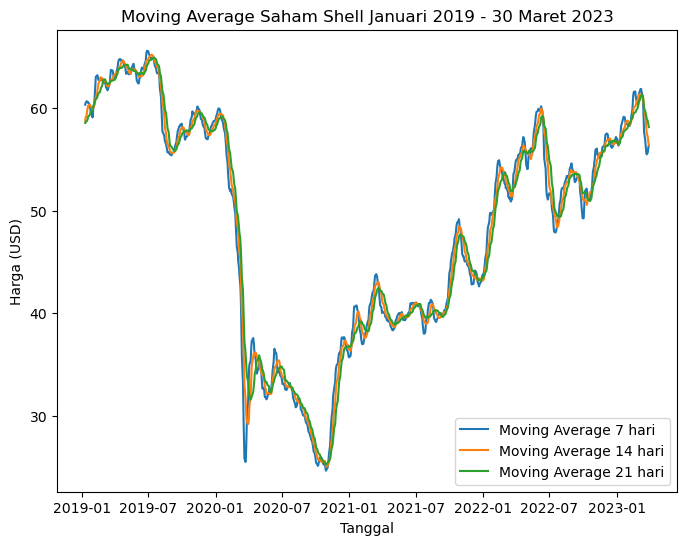

In [64]:
plt.figure(figsize=(8,6))
plt.plot(df_shel.index, df_shel['MA7'], label = "Moving Average 7 hari")
plt.plot(df_shel.index, df_shel['MA14'], label = "Moving Average 14 hari")
plt.plot(df_shel.index, df_shel['MA21'], label = "Moving Average 21 hari")
plt.title('Moving Average Saham Shell Januari 2019 - 30 Maret 2023')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend(loc='best')
plt.savefig('MA Shell.png')
plt.show()

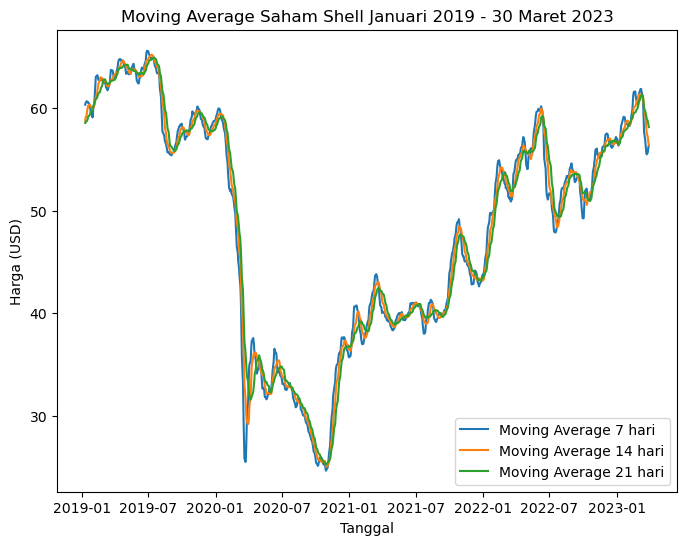

In [65]:
plt.figure(figsize=(8,6))
plt.plot(df_shel.index, df_shel['MA7'], label = "Moving Average 7 hari")
plt.plot(df_shel.index, df_shel['MA14'], label = "Moving Average 14 hari")
plt.plot(df_shel.index, df_shel['MA21'], label = "Moving Average 21 hari")
plt.title('Moving Average Saham Shell Januari 2019 - 30 Maret 2023')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.legend(loc='best')
plt.savefig('MA Shell.png')
plt.show()

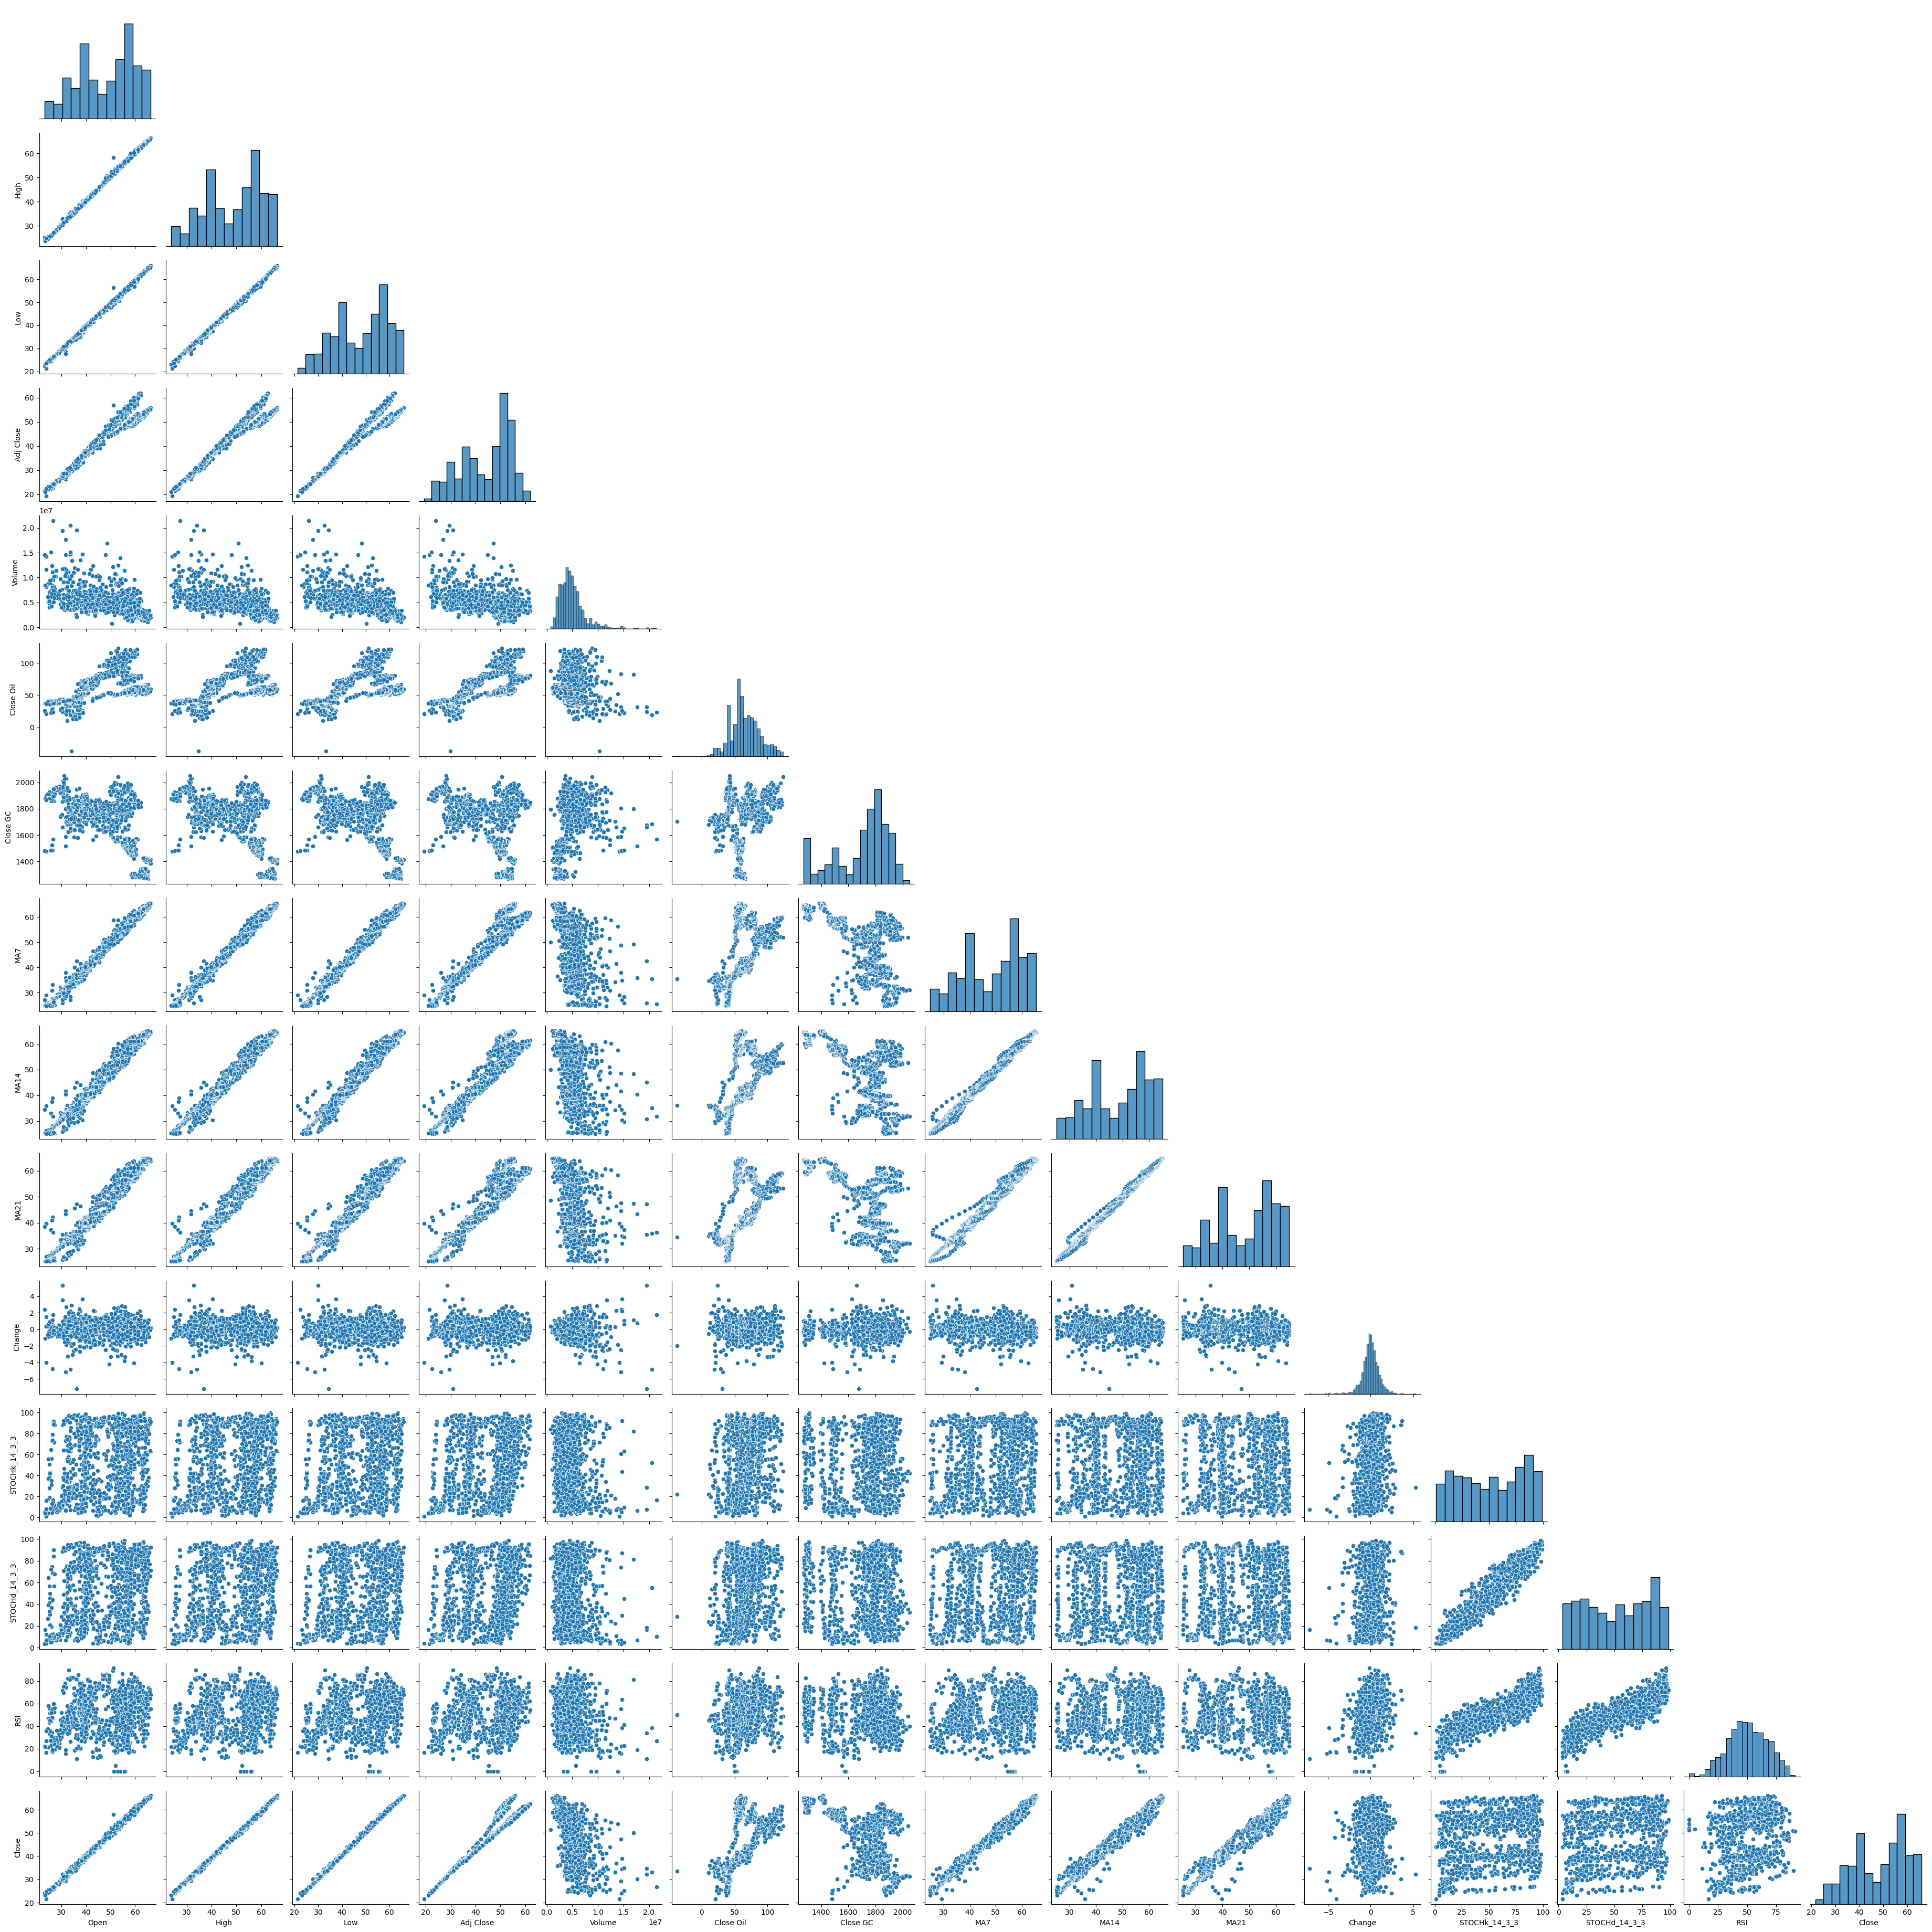

In [66]:
sns.pairplot(df_shel,corner=True)
plt.savefig('Pairplot Shell.png')

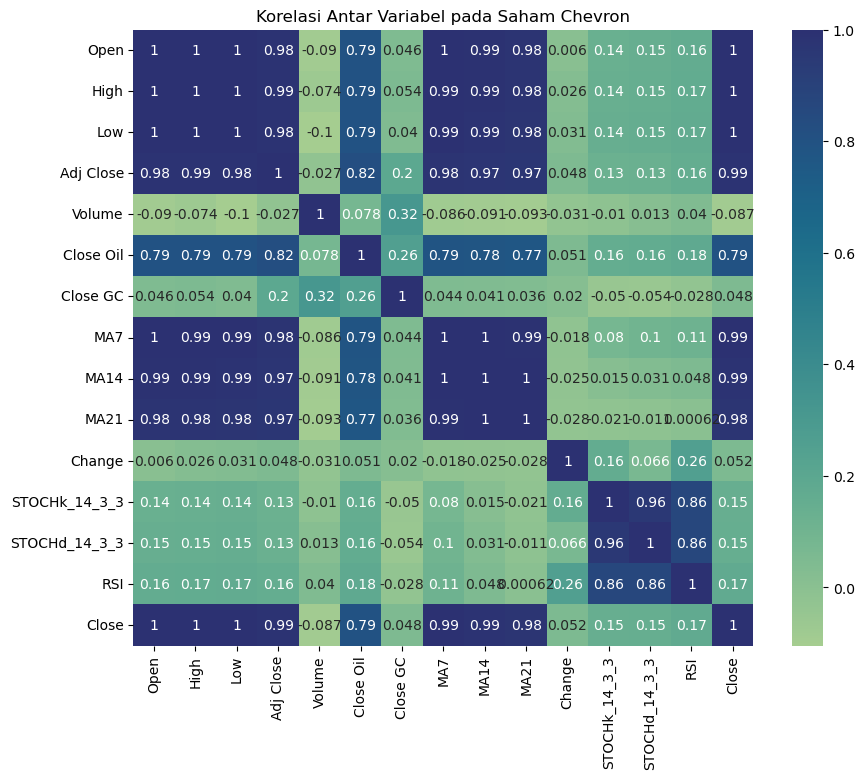

In [67]:
corr_cvx = df_cvx.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_cvx, annot = True, cmap = 'crest')
plt.title('Korelasi Antar Variabel pada Saham Chevron')
plt.savefig('corr chevron.png')

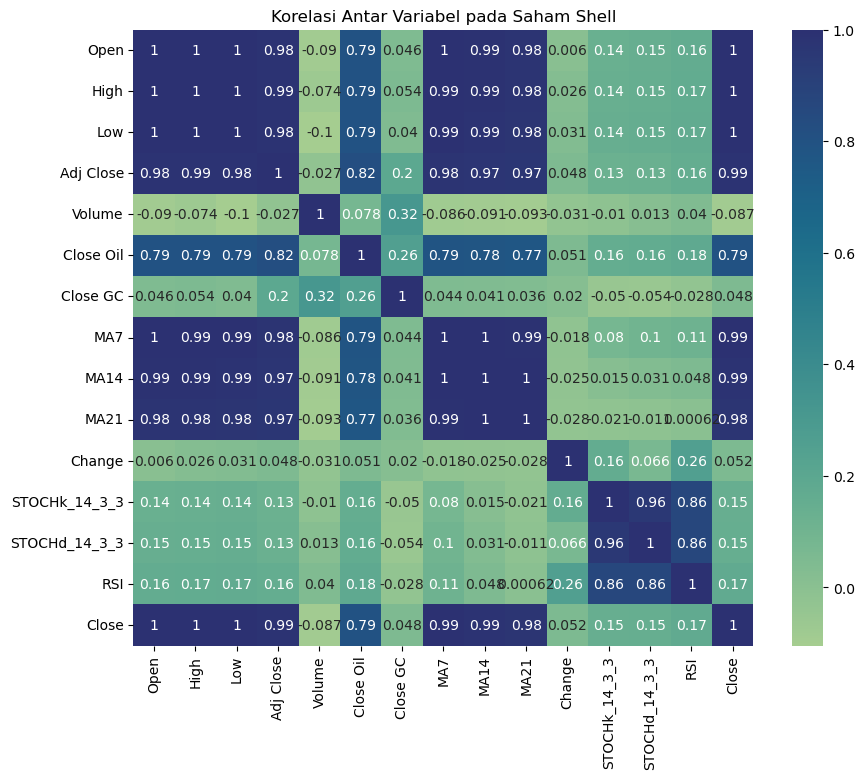

In [68]:
corr_shel = df_shel.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_cvx, annot = True, cmap = 'crest')
plt.title('Korelasi Antar Variabel pada Saham Shell')
plt.savefig('corr shell.png')

## Split Data

In [69]:
X_cvx = df_cvx.iloc[:,:df_cvx.shape[1]-1]
y_cvx = df_cvx.iloc[:,df_cvx.shape[1]-1]

X_shel = df_shel.iloc[:,:df_shel.shape[1]-1]
y_shel = df_shel.iloc[:,df_shel.shape[1]-1]

In [70]:
scaler = StandardScaler()
X_cvx_scl = scaler.fit_transform(X_cvx)
X_cvx_scl = pd.DataFrame(X_cvx_scl, index=X_cvx.index, columns=X_cvx.columns)

scaler = StandardScaler()
X_shel_scl = scaler.fit_transform(X_shel)
X_shel_scl = pd.DataFrame(X_shel_scl, index=X_shel.index, columns=X_shel.columns)

In [71]:
train_size = int(df_cvx.shape[0]*0.8)
X_train_cvx = X_cvx_scl.iloc[:train_size,:]
y_train_cvx = y_cvx.iloc[:train_size]

X_test_cvx = X_cvx_scl.iloc[train_size:,:]
y_test_cvx = y_cvx.iloc[train_size:]

In [72]:
X_train_cvx

Open      High       Low  Adj Close    Volume  Close Oil  \
Date                                                                       
2019-01-10 -0.267809 -0.273360 -0.250148  -0.529455 -0.716477  -0.591162   
2019-01-11 -0.251555 -0.292437 -0.251486  -0.552319 -1.018983  -0.637339   
2019-01-14 -0.306619 -0.315791 -0.271221  -0.572922 -0.708202  -0.687210   
2019-01-15 -0.285390 -0.291780 -0.256838  -0.562872 -1.069623  -0.613327   
2019-01-16 -0.303634 -0.316449 -0.266538  -0.580962 -0.803076  -0.604092   
...              ...       ...       ...        ...       ...        ...   
2022-05-18  1.775862  1.716598  1.558790   1.598486  0.623733   2.040918   
2022-05-19  1.461069  1.568913  1.459781   1.562938  0.214036   2.161902   
2022-05-20  1.602046  1.614961  1.501927   1.591376 -0.042159   2.209002   
2022-05-23  1.620290  1.678114  1.669842   1.706906  0.072506   2.073242   
2022-05-24  1.662086  1.698507  1.693257   1.734159 -0.010184   2.049230   

            Close GC       MA7      MA14      MA21    Change  STOCHk_14_3_3  \
Date                                                                          
2019-01-10 -2.132582 -0.296987 -0.380965 -0.332545  0.053479       1.316174   
2019-01-11 -2.120391 -0.288183 -0.362865 -0.337253 -0.382214       1.367013   
2019-01-14 -2.110232 -0.273193 -0.344885 -0.343519 -0.346241       1.233739   
2019-01-15 -2.124963 -0.267006 -0.318237 -0.349657  0.141418       1.119380   
2019-01-16 -2.097534 -0.271099 -0.308636 -0.353561 -0.306269       0.907128   
...              ...       ...       ...       ...       ...            ...   
2022-05-18  0.565638  1.562725  1.508440  1.480479 -2.404798       0.957723   
2022-05-19  0.694149  1.591658  1.532837  1.471369 -0.498133       0.563241   
2022-05-20  0.697197  1.613835  1.552158  1.476575  0.365263       0.134088   
2022-05-23  0.727674  1.647194  1.574256  1.493880  1.540434       0.310880   
2022-05-24  0.815548  1.669894  1.586347  1.518222  0.349271       0.618339   

            STOCHd_14_3_3       RSI  
Date                                 
2019-01-10       1.129001  0.547978  
2019-01-11       1.313533  0.847330  
2019-01-14       1.343721  0.839007  
2019-01-15       1.276186  1.484629  
2019-01-16       1.118365  0.674983  
...                   ...       ...  
2022-05-18       1.035359  0.241162  
2022-05-19       0.924072  0.506110  
2022-05-20       0.567500  0.399337  
2022-05-23       0.345519  0.458901  
2022-05-24       0.364427  0.229836  

[850 rows x 14 columns]

In [73]:
train_size = int(df_shel.shape[0]*0.8)
X_train_shel = X_shel_scl.iloc[:train_size,:]
y_train_shel = y_shel.iloc[:train_size]

X_test_shel = X_shel_scl.iloc[train_size:,:]
y_test_shel = y_shel.iloc[train_size:]

In [74]:
X_train_shel

Open      High       Low  Adj Close    Volume  Close Oil  \
Date                                                                       
2019-01-10  1.082408  1.117631  1.106529   0.603889 -1.147067  -0.591162   
2019-01-11  1.081517  1.073040  1.093212   0.546561 -0.711429  -0.637339   
2019-01-14  1.040526  1.064567  1.074568   0.535915 -0.960822  -0.687210   
2019-01-15  1.074388  1.078391  1.079895   0.536733 -1.161896  -0.613327   
2019-01-16  1.029833  1.012396  1.049710   0.504794 -0.808934  -0.604092   
...              ...       ...       ...        ...       ...        ...   
2022-05-18  0.980822  0.969508  0.902335   1.147399  0.878244   2.040918   
2022-05-19  0.826662  0.924105  0.857945   1.207863  0.573586   2.161902   
2022-05-20  0.936267  0.931240  0.838413   1.187708 -0.202498   2.209002   
2022-05-23  0.986169  1.010612  1.010647   1.347987  1.135106   2.073242   
2022-05-24  0.951416  1.001694  0.967144   1.341268  0.038847   2.049230   

            Close GC       MA7      MA14      MA21    Change  STOCHk_14_3_3  \
Date                                                                          
2019-01-10 -2.132582  1.062248  0.926968  0.911255  0.279024       1.462792   
2019-01-11 -2.120391  1.077548  0.953287  0.920051 -0.687745       1.420683   
2019-01-14 -2.110232  1.092849  0.977172  0.926186 -0.125443       1.270163   
2019-01-15 -2.124963  1.091191  1.008933  0.931292  0.012666       1.123644   
2019-01-16 -2.097534  1.083541  1.023853  0.939016 -0.381930       0.978497   
...              ...       ...       ...       ...       ...            ...   
2022-05-18  0.565638  0.750629  0.695610  0.666639 -0.115580       1.332085   
2022-05-19  0.694149  0.796658  0.728396  0.669557  0.131048       1.185862   
2022-05-20  0.697197  0.828151  0.757916  0.676551 -0.204361       0.965626   
2022-05-23  0.727674  0.889225  0.785899  0.695945  1.650249       1.132839   
2022-05-24  0.815548  0.930536  0.804918  0.722376 -0.066252       1.267240   

            STOCHd_14_3_3       RSI  
Date                                 
2019-01-10       1.496419  1.446821  
2019-01-11       1.484908  1.332146  
2019-01-14       1.422412  1.222518  
2019-01-15       1.306148  1.903310  
2019-01-16       1.154562  1.167067  
...                   ...       ...  
2022-05-18       1.200013  0.657055  
2022-05-19       1.313207  1.100649  
2022-05-20       1.192707  0.994331  
2022-05-23       1.124403  0.958596  
2022-05-24       1.152300  0.711938  

[850 rows x 14 columns]

# Modelling

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

## K-Nearest Neighbor Regression

### Saham CVX

#### Melakukan prediksi dengan parameter default

Dengan model KNN Regressor

dengan parameter (default):

n_neighbors = 5

weights     = 'uniform'

algorithm   = 'auto'

leaf_size   = 30

p           = 2 (1 for l1 dsit and 2 for l2 dist)



didapatkan: 

MSE  = 88.71672821831733

RMSE = 9.418955792353913

MAE  = 8.416901881258253

R2   = 0.45575188764301877


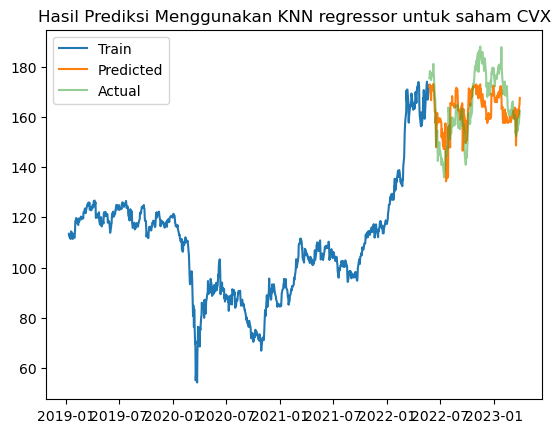

In [51]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train_cvx, y_train_cvx)
test_knnr = knn_regressor.predict(X_test_cvx)

mse = mean_squared_error(y_test_cvx,test_knnr)
rmse = mean_squared_error(y_test_cvx,test_knnr, squared=False)
mae = mean_absolute_error(y_test_cvx,test_knnr)
r2 = r2_score(y_test_cvx,test_knnr)

plt.plot(X_train_cvx.index,y_train_cvx,label='Train')
plt.plot(X_test_cvx.index,test_knnr,label='Predicted')
plt.plot(X_test_cvx.index,y_test_cvx,alpha=0.5,label='Actual')
plt.title('Hasil Prediksi Menggunakan KNN regressor untuk saham CVX')
plt.legend()

print(f'''Dengan model KNN Regressor
dengan parameter (default):
n_neighbors = 5
weights     = 'uniform'
algorithm   = 'auto'
leaf_size   = 30
p           = 2 (1 for l1 dsit and 2 for l2 dist)

didapatkan: 
MSE  = {mse}
RMSE = {rmse}
MAE  = {mae}
R2   = {r2}''')

Hasil percobaan mencari parameter terbaik ditemukan bahwa parmeter terbaik adalah:

- n_neighbors = 18
- weights = 'distance'
- algorithm = auto
- leaf_size = default (30)
- p = 1

### Melakukan prediksi harga lagi menggunakan hasil parameter terbaik

Dengan model KNN Regressor

dengan parameter (default):

n_neighbors = 5

weights     = 'uniform'

algorithm   = 'auto'

leaf_size   = 30

p           = 2 (1 for l1 dsit and 2 for l2 dist)



didapatkan: 

MSE  = 73.77985452928283

RMSE = 8.589520040682299

MAE  = 7.505117187058464

R2   = 0.547384722543858


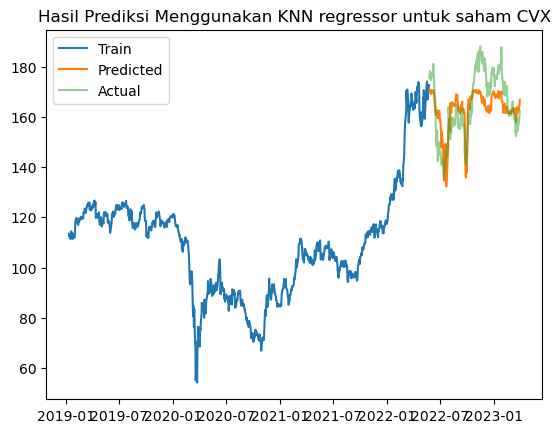

In [52]:
knn_regressor = KNeighborsRegressor(n_neighbors=18,
                                       weights = 'distance',
                                       algorithm= 'auto',
                                       leaf_size = 30,
                                       p = 1)
knn_regressor.fit(X_train_cvx, y_train_cvx)
test_knnr = knn_regressor.predict(X_test_cvx)

mse = mean_squared_error(y_test_cvx,test_knnr)
rmse = mean_squared_error(y_test_cvx,test_knnr, squared=False)
r2 = r2_score(y_test_cvx,test_knnr)

plt.plot(X_train_cvx.index,y_train_cvx,label='Train')
plt.plot(X_test_cvx.index,test_knnr,label='Predicted')
plt.plot(X_test_cvx.index,y_test_cvx,alpha=0.5,label='Actual')
plt.title('Hasil Prediksi Menggunakan KNN regressor untuk saham CVX')
plt.legend()

print(f'''Dengan model KNN Regressor
dengan parameter (default):
n_neighbors = 18
weights     = 'distance'
algorithm   = 'auto'
leaf_size   = 30
p           = 1 (1 for l1 dsit and 2 for l2 dist)

didapatkan: 
MSE  = {mse}
RMSE = {rmse}
R2   = {r2}''')

#### Tuning parameter dengan gridsearch

In [68]:
n_neighbors_opt = [i for i in range(1,56)]
weights_opt = ['uniform','distance']
algorithm_opt = ["auto","ball_tree","kd_tree","brute"]
p_opt = [1,2]

In [73]:
parameters={"n_neighbors": n_neighbors_opt,
           "weights": weights_opt,
           "algorithm": algorithm_opt,
            "p":p_opt}

scoring = {'neg_mean_absolute_error',
           'neg_mean_squared_error',
           'neg_root_mean_squared_error',
           'r2'}

tuning_model=GridSearchCV(KNeighborsRegressor(),
                          param_grid=parameters,
                          scoring=scoring,cv=5,verbose=1,refit='neg_mean_squared_error')
tuning_model.fit(X_train_cvx,y_train_cvx)
tune_params = tuning_model.best_params_

Fitting 5 folds for each of 880 candidates, totalling 4400 fits


Dengan model KNN Regressor

dengan parameter (default):

n_neighbors = 3

weights     = distance

algorithm   = 'auto'

leaf_size   = 30

p           = 1



didapatkan: 

MSE  = 81.48415563381208

RMSE = 9.026857461697956

MAE  = 7.844212189718157

R2   = 0.5001213549988845


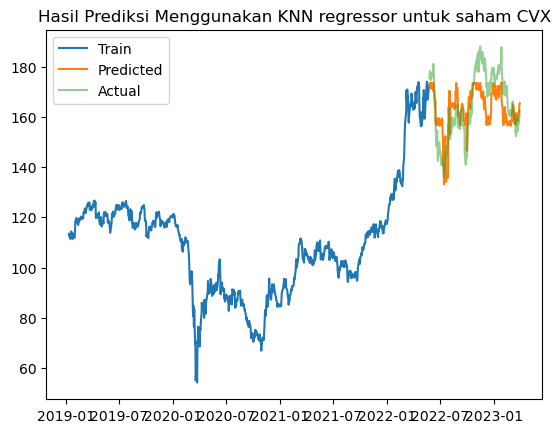

In [76]:
knn_regressor = KNeighborsRegressor(n_neighbors = tune_params['n_neighbors'],
                                       weights = tune_params['weights'],
                                       p = tune_params['p'])
knn_regressor.fit(X_train_cvx, y_train_cvx)
test_knnr = knn_regressor.predict(X_test_cvx)

mse = mean_squared_error(y_test_cvx,test_knnr)
rmse = mean_squared_error(y_test_cvx,test_knnr, squared=False)
r2 = r2_score(y_test_cvx,test_knnr)

plt.plot(X_train_cvx.index,y_train_cvx,label='Train')
plt.plot(X_test_cvx.index,test_knnr,label='Predicted')
plt.plot(X_test_cvx.index,y_test_cvx,alpha=0.5,label='Actual')
plt.title('Hasil Prediksi Menggunakan KNN regressor untuk saham CVX')
plt.legend()

print(f'''Dengan model KNN Regressor
dengan parameter (default):
n_neighbors = {tune_params['n_neighbors']}
weights     = {tune_params['weights']}
algorithm   = 'auto'
leaf_size   = 30
p           = {tune_params['p']}

didapatkan: 
MSE  = {mse}
RMSE = {rmse}
R2   = {r2}''')

### Saham SHELL

Dengan model KNN Regressor

dengan parameter (default):

n_neighbors = 5

weights     = 'uniform'

algorithm   = 'auto'

leaf_size   = 30

p           = 2 (1 for l1 dsit and 2 for l2 dist)



didapatkan: 

MSE  = 5.45930679595228

RMSE = 2.3365159524283756

MAE  = 1.9133144826396529

R2   = 0.6206056402702298


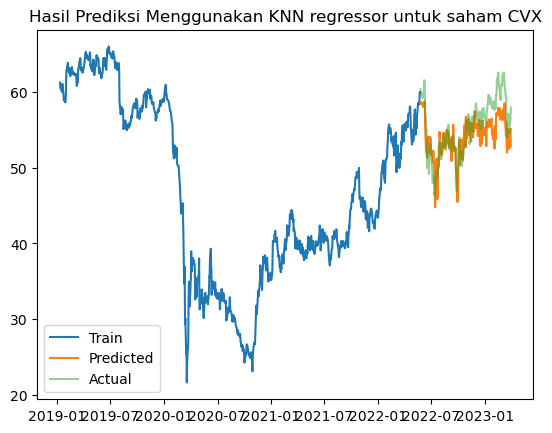

In [77]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train_shel,y_train_shel)
test_knnr = knn_regressor.predict(X_test_shel)

mse = mean_squared_error(y_test_shel,test_knnr)
rmse = mean_squared_error(y_test_shel,test_knnr, squared=False)
r2 = r2_score(y_test_shel,test_knnr)

plt.plot(X_train_shel.index,y_train_shel,label='Train')
plt.plot(X_test_shel.index,test_knnr,label='Predicted')
plt.plot(X_test_shel.index,y_test_shel,alpha=0.5,label='Actual')
plt.title('Hasil Prediksi Menggunakan KNN regressor untuk saham CVX')
plt.legend()

print(f'''Dengan model KNN Regressor
dengan parameter (default):
n_neighbors = 5
weights     = 'uniform'
algorithm   = 'auto'
leaf_size   = 30
p           = 2 (1 for l1 dsit and 2 for l2 dist)

didapatkan: 
MSE  = {mse}
RMSE = {rmse}
R2   = {r2}''')

Dengan model KNN Regressor

dengan parameter (default):

n_neighbors = 18

weights     = 'distance'

algorithm   = 'auto'

leaf_size   = 30

p           = 1 (1 for l1 dsit and 2 for l2 dist)



didapatkan: 

MSE  = 1.8017977788767863

RMSE = 1.3423106119213937

MAE  = 1.0250663313229527

R2   = 0.8747841181619763


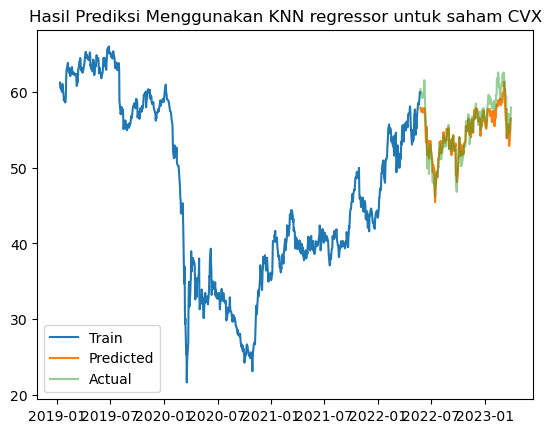

In [78]:
knn_regressor = KNeighborsRegressor(n_neighbors=18,
                                       weights = 'distance',
                                       algorithm= 'auto',
                                       leaf_size = 30,
                                       p = 1)
knn_regressor.fit(X_train_shel,y_train_shel)
test_knnr = knn_regressor.predict(X_test_shel)

mse = mean_squared_error(y_test_shel,test_knnr)
rmse = mean_squared_error(y_test_shel,test_knnr, squared=False)
r2 = r2_score(y_test_shel,test_knnr)

plt.plot(X_train_shel.index,y_train_shel,label='Train')
plt.plot(X_test_shel.index,test_knnr,label='Predicted')
plt.plot(X_test_shel.index,y_test_shel,alpha=0.5,label='Actual')
plt.title('Hasil Prediksi Menggunakan KNN regressor untuk saham CVX')
plt.legend()


print(f'''Dengan model KNN Regressor
dengan parameter (default):
n_neighbors = 18
weights     = 'distance'
algorithm   = 'auto'
leaf_size   = 30
p           = 1 (1 for l1 dsit and 2 for l2 dist)

didapatkan: 
MSE  = {mse}
RMSE = {rmse}
R2   = {r2}''')

Dengan model KNN Regressor

dengan parameter (default):

n_neighbors = 3

weights     = distance

algorithm   = 'auto'

leaf_size   = 30

p           = 1



didapatkan: 

MSE  = 2.054318800651503

RMSE = 1.4332895034331004

MAE  = 1.133842503603236

R2   = 0.8572351774346372


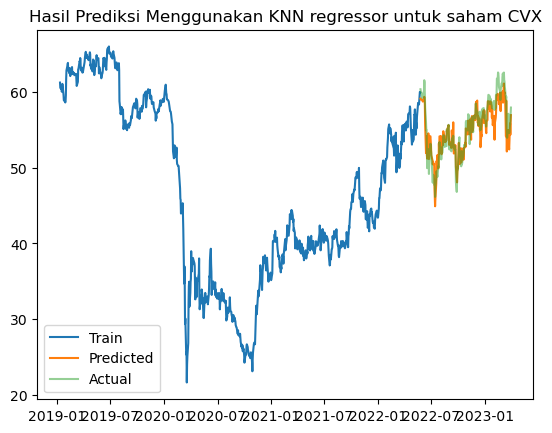

In [79]:
knn_regressor = KNeighborsRegressor(n_neighbors = tune_params['n_neighbors'],
                                       weights = tune_params['weights'],
                                       p = tune_params['p'])
knn_regressor.fit(X_train_shel,y_train_shel)
test_knnr = knn_regressor.predict(X_test_shel)

mse = mean_squared_error(y_test_shel,test_knnr)
rmse = mean_squared_error(y_test_shel,test_knnr, squared=False)
r2 = r2_score(y_test_shel,test_knnr)

plt.plot(X_train_shel.index,y_train_shel,label='Train')
plt.plot(X_test_shel.index,test_knnr,label='Predicted')
plt.plot(X_test_shel.index,y_test_shel,alpha=0.5,label='Actual')
plt.title('Hasil Prediksi Menggunakan KNN regressor untuk saham CVX')
plt.legend()

print(f'''Dengan model KNN Regressor
dengan parameter (default):
n_neighbors = {tune_params['n_neighbors']}
weights     = {tune_params['weights']}
algorithm   = 'auto'
leaf_size   = 30
p           = {tune_params['p']}

didapatkan: 
MSE  = {mse}
RMSE = {rmse}
R2   = {r2}''')

## 1d-Convolutional Neural Network for Regression

In [21]:
from keras.models import Sequential
from keras.layers import Conv1D,MaxPooling1D,Flatten,Dense, Dropout, Activation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error 
from keras.optimizers import SGD
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

### Saham CVX

In [87]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(14,1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_cvx, y_train_cvx, epochs=10, batch_size=32)

test_cnn = model.predict(X_test_cvx)

Epoch 1/10
27/27 [==============================] - 2s 5ms/step - loss: 11489.0449
Epoch 2/10
27/27 [==============================] - 0s 4ms/step - loss: 3555.4355
Epoch 3/10
27/27 [==============================] - 0s 4ms/step - loss: 1524.1000
Epoch 4/10
27/27 [==============================] - 0s 4ms/step - loss: 1158.0146
Epoch 5/10
27/27 [==============================] - 0s 4ms/step - loss: 847.0578
Epoch 6/10
27/27 [==============================] - 0s 4ms/step - loss: 630.8816
Epoch 7/10
27/27 [==============================] - 0s 4ms/step - loss: 454.9287
Epoch 8/10
27/27 [==============================] - 0s 4ms/step - loss: 321.1068
Epoch 9/10
27/27 [==============================] - 0s 5ms/step - loss: 229.8555
Epoch 10/10
7/7 [==============================] - 0s 4ms/step


Evaluasi Metrik untuk CNN 1D:
MSE  = 107.70754658322926
RMSE = 10.378224635419551
R2   = 0.3392494280191348


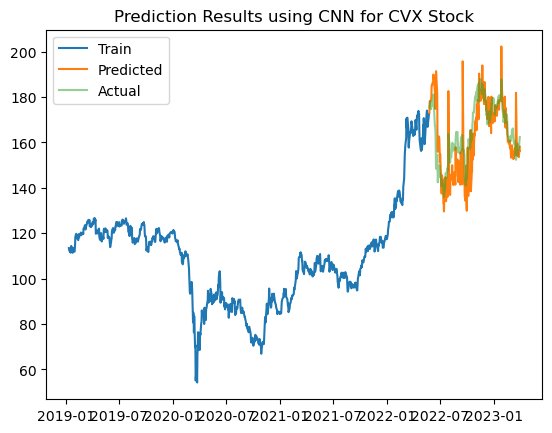

In [88]:
mse = mean_squared_error(y_test_cvx, test_cnn)
rmse = mean_squared_error(y_test_cvx, test_cnn, squared=False)
r2 = r2_score(y_test_cvx, test_cnn)

# Plot the results
plt.plot(X_train_cvx.index, y_train_cvx, label='Train')
plt.plot(X_test_cvx.index, test_cnn, label='Predicted')
plt.plot(X_test_cvx.index, y_test_cvx, alpha=0.5, label='Actual')
plt.title('Prediction Results using CNN for CVX Stock')
plt.legend()

print(f'''Evaluasi Metrik untuk CNN 1D:
MSE  = {mse}
RMSE = {rmse}
R2   = {r2}''')

In [90]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the CNN model
def create_model(filters=64, kernel_size=3, pool_size=2, dense_units=64):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(14,1)))
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the parameter grid
param_grid = {
    'filters': [32, 64],
    'kernel_size': [3, 5],
    'pool_size': [2, 3],
    'dense_units': [32, 64]
}

scoring = {
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

# Perform grid search
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring=scoring,
                    cv=5,
                    refit='neg_mean_squared_error')

grid_result = grid.fit(X_train_cvx, y_train_cvx)

# Print the best parameters and score
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)

/tmp/ipykernel_29/1180710279.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best Parameters:  {'dense_units': 64, 'filters': 64, 'kernel_size': 5, 'pool_size': 2}
Best Score:  -10231.53792610509


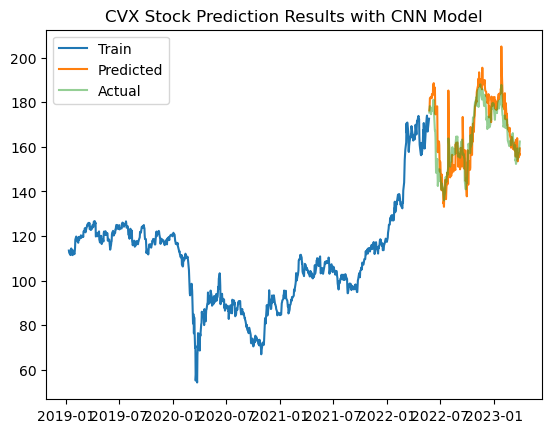

Mean Squared Error (MSE):  53.00224338336782
Root Mean Squared Error (RMSE):  7.280263963852398
R^2 Score:  0.6748485714994241


In [94]:
# Train the model
model.fit(X_train_cvx, y_train_cvx, epochs=10, batch_size=32)

# Make predictions
test_cnn = model.predict(X_test_cvx)

# Calculate metrics
mse = mean_squared_error(y_test_cvx, test_cnn)
rmse = mean_squared_error(y_test_cvx, test_cnn, squared=False)
r2 = r2_score(y_test_cvx, test_cnn)

# Visualize the results
plt.plot(X_train_cvx.index, y_train_cvx, label='Train')
plt.plot(X_test_cvx.index, test_cnn, label='Predicted')
plt.plot(X_test_cvx.index, y_test_cvx, alpha=0.5, label='Actual')
plt.title('CVX Stock Prediction Results with CNN Model')
plt.legend()
plt.show()

# Print the metrics
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R^2 Score: ", r2)

### Saham SHELL

In [92]:
# Define the CNN model
def create_model(filters=64, kernel_size=3, pool_size=2, dense_units=64):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(14,1)))
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the parameter grid
param_grid = {
    'filters': [32, 64],
    'kernel_size': [3, 5],
    'pool_size': [2, 3],
    'dense_units': [32, 64]
}

scoring = {
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

# Perform grid search
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring=scoring,
                    cv=5,
                    refit='neg_mean_squared_error')

grid_result = grid.fit(X_train_shel, y_train_shel)

# Print the best parameters and score
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)

/tmp/ipykernel_29/1770014171.py:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best Parameters:  {'dense_units': 64, 'filters': 64, 'kernel_size': 3, 'pool_size': 2}
Best Score:  -1370.1786205648154


7/7 [==============================] - 0s 2ms/step


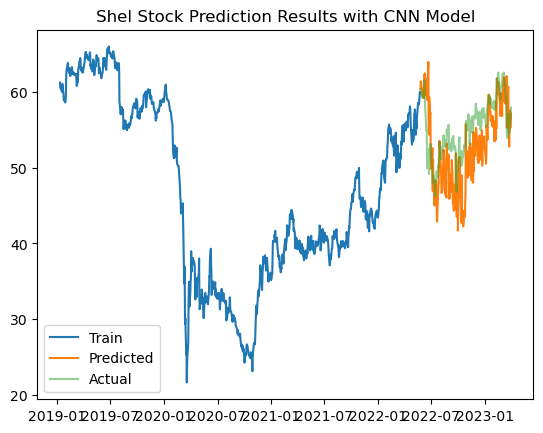

Mean Squared Error (MSE):  19.599038381279737
Root Mean Squared Error (RMSE):  4.427080119139447
R^2 Score:  -0.36203457616596135


In [95]:
# Train the model with best parameters
best_model = create_model(**grid_result.best_params_)
best_model.fit(X_train_shel, y_train_shel, epochs=10, batch_size=32, verbose=0)

# Make predictions
test_cnn = best_model.predict(X_test_shel)

# Calculate metrics
mse = mean_squared_error(y_test_shel, test_cnn)
rmse = mean_squared_error(y_test_shel, test_cnn, squared=False)
r2 = r2_score(y_test_shel, test_cnn)

# Visualize the results
plt.plot(X_train_shel.index, y_train_shel, label='Train')
plt.plot(X_test_shel.index, test_cnn, label='Predicted')
plt.plot(X_test_shel.index, y_test_shel, alpha=0.5, label='Actual')
plt.title('Shel Stock Prediction Results with CNN Model')
plt.legend()
plt.show()

# Print the metrics
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R^2 Score: ", r2)

#### Tuning parameter dengan mencari parameter terbaik

In [163]:
n_neighbors_list = []
weights_list = []
algorithm_list = []
leaf_size_list = []
p_list = []

In [164]:
MSE_list = []
MAE_list = []
RMSE_list = []
R2_list = []

##### Parameter n_neighbors

In [153]:
idx = 0
for i in n_neighbors_opt:
    weights = weights_opt[0] #default = 'uniform'
    algorithm = algorithm_opt[0] #default = auto
    leaf_size = 30 #default = 30
    p = p_opt[1] #default = 2
    
    knn_regressor = KNeighborsRegressor(n_neighbors=i,
                                       weights = weights,
                                       algorithm=algorithm,
                                       leaf_size = leaf_size,
                                       p = p)
    
    knn_regressor.fit(X_train_cvx, y_train_cvx)
    test_knnr = knn_regressor.predict(X_test_cvx)

    mse = mean_squared_error(y_test_cvx,test_knnr)
    rmse = mean_squared_error(y_test_cvx,test_knnr, squared=False)
    mae = mean_absolute_error(y_test_cvx,test_knnr)
    r2 = r2_score(y_test_cvx,test_knnr)
    
    MSE_list.append(mse)
    RMSE_list.append(rmse)
    MAE_list.append(mae)
    R2_list.append(r2)
    
    score = 0
    if mse <= min(MSE_list):
        score += 1
    if rmse <= min(RMSE_list):
        score += 1
    if mae <= min(MAE_list):
        score += 1
    if r2 >= max(R2_list):
        score += 1

    if score >= best_score:
        best_n_neighbors = i
        best_score = score

    n_neighbors_list.append(i)
    weights_list.append(weights)
    algorithm_list.append(algorithm)
    leaf_size_list.append(leaf_size)
    p_list.append(p)

print(f"Best n_neighbors = {best_n_neighbors} with score = {best_score}")

Best n_neighbors = 18 with score = 4


In [154]:
df_score_tree_cvx = pd.DataFrame({'n_neighbors':n_neighbors_list,
                              'weights': weights_list,
                             'algorithm': algorithm_list,
                             'leaf_size' : leaf_size_list,
                             'p_size' : p_list,
                             'MSE':MSE_list,
                             'RMSE':RMSE_list,
                             'MAE':MAE_list,
                             'R2':R2_list})

df_score_tree_cvx

n_neighbors  weights algorithm  leaf_size  p_size         MSE       RMSE  \
0             1  uniform      auto         30       2  107.083107  10.348097   
1             2  uniform      auto         30       2  108.161599  10.400077   
2             3  uniform      auto         30       2   99.602202   9.980090   
3             4  uniform      auto         30       2   94.076523   9.699305   
4             5  uniform      auto         30       2   88.716728   9.418956   
5             6  uniform      auto         30       2   86.585080   9.305110   
6             7  uniform      auto         30       2   85.291083   9.235317   
7             8  uniform      auto         30       2   84.299765   9.181490   
8             9  uniform      auto         30       2   83.429753   9.133989   
9            10  uniform      auto         30       2   83.425090   9.133734   
10           11  uniform      auto         30       2   82.285638   9.071143   
11           12  uniform      auto         30       2   82.065017   9.058974   
12           13  uniform      auto         30       2   82.429105   9.079048   
13           14  uniform      auto         30       2   81.783970   9.043449   
14           15  uniform      auto         30       2   80.611735   8.978404   
15           16  uniform      auto         30       2   80.737283   8.985393   
16           17  uniform      auto         30       2   80.725905   8.984760   
17           18  uniform      auto         30       2   80.378280   8.965393   
18           19  uniform      auto         30       2   80.879215   8.993287   
19           20  uniform      auto         30       2   81.264582   9.014687   
20           21  uniform      auto         30       2   81.802424   9.044469   
21           22  uniform      auto         30       2   82.413565   9.078192   
22           23  uniform      auto         30       2   82.650250   9.091218   
23           24  uniform      auto         30       2   82.730805   9.095648   
24           25  uniform      auto         30       2   82.250289   9.069195   
25           26  uniform      auto         30       2   82.604129   9.088681   
26           27  uniform      auto         30       2   82.654814   9.091469   
27           28  uniform      auto         30       2   82.233255   9.068255   
28           29  uniform      auto         30       2   82.609508   9.088977   
29           30  uniform      auto         30       2   82.419233   9.078504   
30           31  uniform      auto         30       2   82.506282   9.083297   
31           32  uniform      auto         30       2   82.537568   9.085019   
32           33  uniform      auto         30       2   82.672333   9.092433   
33           34  uniform      auto         30       2   83.179288   9.120268   
34           35  uniform      auto         30       2   83.169065   9.119708   
35           36  uniform      auto         30       2   83.208713   9.121881   
36           37  uniform      auto         30       2   83.755881   9.151824   
37           38  uniform      auto         30       2   85.093824   9.224631   
38           39  uniform      auto         30       2   86.594829   9.305634   
39           40  uniform      auto         30       2   88.113879   9.386899   
40           41  uniform      auto         30       2   89.096505   9.439094   
41           42  uniform      auto         30       2   91.377705   9.559169   
42           43  uniform      auto         30       2   93.439179   9.666394   
43           44  uniform      auto         30       2   95.286571   9.761484   
44           45  uniform      auto         30       2   97.193562   9.858680   
45           46  uniform      auto         30       2   99.301476   9.965013   
46           47  uniform      auto         30       2  101.982148  10.098621   
47           48  uniform      auto         30       2  105.824147  10.287086   
48           49  uniform      auto         30       2  110.828274  10.527501   
49  

##### Parameter leaf_size (ball_tree)

In [178]:
n_neighbors_list = []
weights_list = []
algorithm_list = []
leaf_size_list = []
p_list = []

In [179]:
MSE_list = []
MAE_list = []
RMSE_list = []
R2_list = []

In [180]:
idx = 0
for i in leaf_size_opt:
    n_neighbors = 18 #terbaik berdasarkan test di atas antara 17 atau 18
    weights = weights_opt[0] #default = 'uniform'
    algorithm = algorithm1_opt[0] #default = auto
    leaf_size = i #default = 30
    p = p_opt[1] #default = 2
    
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors,
                                       weights = weights,
                                       algorithm=algorithm,
                                       leaf_size = leaf_size,
                                       p = p)
    
    knn_regressor.fit(X_train_cvx, y_train_cvx)
    test_knnr = knn_regressor.predict(X_test_cvx)

    mse = mean_squared_error(y_test_cvx,test_knnr)
    rmse = mean_squared_error(y_test_cvx,test_knnr, squared=False)
    mae = mean_absolute_error(y_test_cvx,test_knnr)
    r2 = r2_score(y_test_cvx,test_knnr)
    
    MSE_list.append(mse)
    RMSE_list.append(rmse)
    MAE_list.append(mae)
    R2_list.append(r2)
    
    score = 0
    if mse <= min(MSE_list):
        score += 1
    if rmse <= min(RMSE_list):
        score += 1
    if mae <= min(MAE_list):
        score += 1
    if r2 >= max(R2_list):
        score += 1

    if score >= best_score:
        best_n_neighbors = i
        best_score = score

    n_neighbors_list.append(n_neighbors)
    weights_list.append(weights)
    algorithm_list.append(algorithm)
    leaf_size_list.append(leaf_size)
    p_list.append(p)

print(f"Best leaf_size for ball_tree alg = {best_n_neighbors} with score = {best_score}")

Best leaf_size for ball_tree alg = 1000 with score = 4


In [181]:
df_score_tree_cvx = pd.DataFrame({'n_neighbors':n_neighbors_list,
                              'weights': weights_list,
                             'algorithm': algorithm_list,
                             'leaf_size' : leaf_size_list,
                             'p_size' : p_list,
                             'MSE':MSE_list,
                             'RMSE':RMSE_list,
                             'MAE':MAE_list,
                             'R2':R2_list})

df_score_tree_cvx

n_neighbors  weights  algorithm  leaf_size  p_size       MSE      RMSE  \
0             18  uniform  ball_tree         10       2  80.37828  8.965393   
1             18  uniform  ball_tree         15       2  80.37828  8.965393   
2             18  uniform  ball_tree         20       2  80.37828  8.965393   
3             18  uniform  ball_tree         25       2  80.37828  8.965393   
4             18  uniform  ball_tree         30       2  80.37828  8.965393   
..           ...      ...        ...        ...     ...       ...       ...   
194           18  uniform  ball_tree        980       2  80.37828  8.965393   
195           18  uniform  ball_tree        985       2  80.37828  8.965393   
196           18  uniform  ball_tree        990       2  80.37828  8.965393   
197           18  uniform  ball_tree        995       2  80.37828  8.965393   
198           18  uniform  ball_tree       1000       2  80.37828  8.965393   

          MAE        R2  
0    7.820496  0.506906  
1    7.820496  0.506906  
2    7.820496  0.506906  
3    7.820496  0.506906  
4    7.820496  0.506906  
..        ...       ...  
194  7.820496  0.506906  
195  7.820496  0.506906  
196  7.820496  0.506906  
197  7.820496  0.506906  
198  7.820496  0.506906  

[199 rows x 9 columns]

##### Parameter leaf_size (kd_tree)

In [182]:
n_neighbors_list = []
weights_list = []
algorithm_list = []
leaf_size_list = []
p_list = []

In [183]:
MSE_list = []
MAE_list = []
RMSE_list = []
R2_list = []

In [185]:
idx = 0
for i in leaf_size_opt:
    n_neighbors = 18 #terbaik berdasarkan test di atas antara 17 atau 18
    weights = weights_opt[0] #default = 'uniform'
    algorithm = algorithm1_opt[1] #default = auto
    leaf_size = i #default = 30
    p = p_opt[1] #default = 2
    
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors,
                                       weights = weights,
                                       algorithm=algorithm,
                                       leaf_size = leaf_size,
                                       p = p)
    
    knn_regressor.fit(X_train_cvx, y_train_cvx)
    test_knnr = knn_regressor.predict(X_test_cvx)

    mse = mean_squared_error(y_test_cvx,test_knnr)
    rmse = mean_squared_error(y_test_cvx,test_knnr, squared=False)
    mae = mean_absolute_error(y_test_cvx,test_knnr)
    r2 = r2_score(y_test_cvx,test_knnr)
    
    MSE_list.append(mse)
    RMSE_list.append(rmse)
    MAE_list.append(mae)
    R2_list.append(r2)
    
    score = 0
    if mse <= min(MSE_list):
        score += 1
    if rmse <= min(RMSE_list):
        score += 1
    if mae <= min(MAE_list):
        score += 1
    if r2 >= max(R2_list):
        score += 1

    if score >= best_score:
        best_n_neighbors = i
        best_score = score

    n_neighbors_list.append(n_neighbors)
    weights_list.append(weights)
    algorithm_list.append(algorithm)
    leaf_size_list.append(leaf_size)
    p_list.append(p)

print(f"Best leaf_size kd_tree alg = {best_n_neighbors} with score = {best_score}")

Best leaf_size kd_tree alg = 1000 with score = 4


In [186]:
df_score_tree_cvx = pd.DataFrame({'n_neighbors':n_neighbors_list,
                              'weights': weights_list,
                             'algorithm': algorithm_list,
                             'leaf_size' : leaf_size_list,
                             'p_size' : p_list,
                             'MSE':MSE_list,
                             'RMSE':RMSE_list,
                             'MAE':MAE_list,
                             'R2':R2_list})

df_score_tree_cvx

n_neighbors  weights algorithm  leaf_size  p_size       MSE      RMSE  \
0             18  uniform   kd_tree         10       2  80.37828  8.965393   
1             18  uniform   kd_tree         15       2  80.37828  8.965393   
2             18  uniform   kd_tree         20       2  80.37828  8.965393   
3             18  uniform   kd_tree         25       2  80.37828  8.965393   
4             18  uniform   kd_tree         30       2  80.37828  8.965393   
..           ...      ...       ...        ...     ...       ...       ...   
194           18  uniform   kd_tree        980       2  80.37828  8.965393   
195           18  uniform   kd_tree        985       2  80.37828  8.965393   
196           18  uniform   kd_tree        990       2  80.37828  8.965393   
197           18  uniform   kd_tree        995       2  80.37828  8.965393   
198           18  uniform   kd_tree       1000       2  80.37828  8.965393   

          MAE        R2  
0    7.820496  0.506906  
1    7.820496  0.506906  
2    7.820496  0.506906  
3    7.820496  0.506906  
4    7.820496  0.506906  
..        ...       ...  
194  7.820496  0.506906  
195  7.820496  0.506906  
196  7.820496  0.506906  
197  7.820496  0.506906  
198  7.820496  0.506906  

[199 rows x 9 columns]

##### Parameter p (power param (l distance) - algorithm auto

In [194]:
n_neighbors_list = []
weights_list = []
algorithm_list = []
leaf_size_list = []
p_list = []

In [195]:
MSE_list = []
MAE_list = []
RMSE_list = []
R2_list = []

In [196]:
idx = 0
for i in p_opt:
    n_neighbors = 18 #terbaik berdasarkan test di atas antara 17 atau 18
    weights = weights_opt[0] #default = 'uniform'
    algorithm = algorithm_opt[0] #default = auto
    leaf_size = 30 #default = 30
    p = i #default = 2
    
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors,
                                       weights = weights,
                                       algorithm=algorithm,
                                       leaf_size = leaf_size,
                                       p = p)
    
    knn_regressor.fit(X_train_cvx, y_train_cvx)
    test_knnr = knn_regressor.predict(X_test_cvx)

    mse = mean_squared_error(y_test_cvx,test_knnr)
    rmse = mean_squared_error(y_test_cvx,test_knnr, squared=False)
    mae = mean_absolute_error(y_test_cvx,test_knnr)
    r2 = r2_score(y_test_cvx,test_knnr)
    
    MSE_list.append(mse)
    RMSE_list.append(rmse)
    MAE_list.append(mae)
    R2_list.append(r2)
    
    score = 0
    if mse <= min(MSE_list):
        score += 1
    if rmse <= min(RMSE_list):
        score += 1
    if mae <= min(MAE_list):
        score += 1
    if r2 >= max(R2_list):
        score += 1

    if score >= best_score:
        best_n_neighbors = i
        best_score = score

    n_neighbors_list.append(n_neighbors)
    weights_list.append(weights)
    algorithm_list.append(algorithm)
    leaf_size_list.append(leaf_size)
    p_list.append(p)

print(f"Best leaf_size kd_tree alg = {best_n_neighbors} with score = {best_score}")

Best leaf_size kd_tree alg = 1 with score = 4


In [197]:
df_score_tree_cvx = pd.DataFrame({'n_neighbors':n_neighbors_list,
                              'weights': weights_list,
                             'algorithm': algorithm_list,
                             'leaf_size' : leaf_size_list,
                             'p_size' : p_list,
                             'MSE':MSE_list,
                             'RMSE':RMSE_list,
                             'MAE':MAE_list,
                             'R2':R2_list})

df_score_tree_cvx

n_neighbors  weights algorithm  leaf_size  p_size       MSE      RMSE  \
0           18  uniform      auto         30       1  75.25255  8.674823   
1           18  uniform      auto         30       2  80.37828  8.965393   

        MAE        R2  
0  7.570869  0.538350  
1  7.820496  0.506906

##### Parameter p (power param (l distance) - algorithm brute

In [198]:
n_neighbors_list = []
weights_list = []
algorithm_list = []
leaf_size_list = []
p_list = []

In [199]:
MSE_list = []
MAE_list = []
RMSE_list = []
R2_list = []

In [200]:
idx = 0
for i in p_opt:
    n_neighbors = 18 #terbaik berdasarkan test di atas antara 17 atau 18
    weights = weights_opt[0] #default = 'uniform'
    algorithm = algorithm_opt[1] #default = auto
    leaf_size = 30 #default = 30
    p = i #default = 2
    
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors,
                                       weights = weights,
                                       algorithm=algorithm,
                                       leaf_size = leaf_size,
                                       p = p)
    
    knn_regressor.fit(X_train_cvx, y_train_cvx)
    test_knnr = knn_regressor.predict(X_test_cvx)

    mse = mean_squared_error(y_test_cvx,test_knnr)
    rmse = mean_squared_error(y_test_cvx,test_knnr, squared=False)
    mae = mean_absolute_error(y_test_cvx,test_knnr)
    r2 = r2_score(y_test_cvx,test_knnr)
    
    MSE_list.append(mse)
    RMSE_list.append(rmse)
    MAE_list.append(mae)
    R2_list.append(r2)
    
    score = 0
    if mse <= min(MSE_list):
        score += 1
    if rmse <= min(RMSE_list):
        score += 1
    if mae <= min(MAE_list):
        score += 1
    if r2 >= max(R2_list):
        score += 1

    if score >= best_score:
        best_n_neighbors = i
        best_score = score

    n_neighbors_list.append(n_neighbors)
    weights_list.append(weights)
    algorithm_list.append(algorithm)
    leaf_size_list.append(leaf_size)
    p_list.append(p)

print(f"Best leaf_size kd_tree alg = {best_n_neighbors} with score = {best_score}")

Best leaf_size kd_tree alg = 1 with score = 4


In [201]:
df_score_tree_cvx = pd.DataFrame({'n_neighbors':n_neighbors_list,
                              'weights': weights_list,
                             'algorithm': algorithm_list,
                             'leaf_size' : leaf_size_list,
                             'p_size' : p_list,
                             'MSE':MSE_list,
                             'RMSE':RMSE_list,
                             'MAE':MAE_list,
                             'R2':R2_list})

df_score_tree_cvx

n_neighbors  weights algorithm  leaf_size  p_size       MSE      RMSE  \
0           18  uniform     brute         30       1  75.25255  8.674823   
1           18  uniform     brute         30       2  80.37828  8.965393   

        MAE        R2  
0  7.570869  0.538350  
1  7.820496  0.506906

##### Parameter p (power param (l distance) - weight distance

In [202]:
n_neighbors_list = []
weights_list = []
algorithm_list = []
leaf_size_list = []
p_list = []

In [203]:
MSE_list = []
MAE_list = []
RMSE_list = []
R2_list = []

In [204]:
idx = 0
for i in p_opt:
    n_neighbors = 18 #terbaik berdasarkan test di atas antara 17 atau 18
    weights = weights_opt[1] #default = 'uniform'
    algorithm = algorithm_opt[0] #default = auto
    leaf_size = 30 #default = 30
    p = i #default = 2
    
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors,
                                       weights = weights,
                                       algorithm=algorithm,
                                       leaf_size = leaf_size,
                                       p = p)
    
    knn_regressor.fit(X_train_cvx, y_train_cvx)
    test_knnr = knn_regressor.predict(X_test_cvx)

    mse = mean_squared_error(y_test_cvx,test_knnr)
    rmse = mean_squared_error(y_test_cvx,test_knnr, squared=False)
    mae = mean_absolute_error(y_test_cvx,test_knnr)
    r2 = r2_score(y_test_cvx,test_knnr)
    
    MSE_list.append(mse)
    RMSE_list.append(rmse)
    MAE_list.append(mae)
    R2_list.append(r2)
    
    score = 0
    if mse <= min(MSE_list):
        score += 1
    if rmse <= min(RMSE_list):
        score += 1
    if mae <= min(MAE_list):
        score += 1
    if r2 >= max(R2_list):
        score += 1

    if score >= best_score:
        best_n_neighbors = i
        best_score = score

    n_neighbors_list.append(n_neighbors)
    weights_list.append(weights)
    algorithm_list.append(algorithm)
    leaf_size_list.append(leaf_size)
    p_list.append(p)

print(f"Best leaf_size kd_tree alg = {best_n_neighbors} with score = {best_score}")

Best leaf_size kd_tree alg = 1 with score = 4


In [205]:
df_score_tree_cvx = pd.DataFrame({'n_neighbors':n_neighbors_list,
                              'weights': weights_list,
                             'algorithm': algorithm_list,
                             'leaf_size' : leaf_size_list,
                             'p_size' : p_list,
                             'MSE':MSE_list,
                             'RMSE':RMSE_list,
                             'MAE':MAE_list,
                             'R2':R2_list})

df_score_tree_cvx

n_neighbors   weights algorithm  leaf_size  p_size        MSE      RMSE  \
0           18  distance      auto         30       1  73.779854  8.589520   
1           18  distance      auto         30       2  79.786627  8.932336   

        MAE        R2  
0  7.505117  0.547385  
1  7.794003  0.510535